# Gutenberg Chapters Dataset with Hierarchical Attention Network (HAN)
HAN analysis with the h2 hierarchical Gutenberg chapters dataset. Using the following configuration:
1. Using Learned Embedding
1. Term Embedding size: 100
1. Sentence Embedding size: 200
1. Document Embedding size: 300
1. Top vocabulary count 5,000
1. Adam Learning Rate of 1e-4
1. Gradient Constraint: 5.0

In [1]:
%matplotlib inline

import os
import sys
ai_lit_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
print("Loading AI Lit system from path", ai_lit_path)
sys.path.append(ai_lit_path)

import numpy as np
import pandas as pd
import tensorflow as tf

from ai_lit.analysis import analysis_util
from ai_lit.input.gutenberg_dataset import gb_input
from ai_lit.university.gutenberg import gb_chap_han

Loading AI Lit system from path C:\Users\joewo\workspaces\python\ai_lit


C:\Tools\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
dataset_wkspc = os.path.join(ai_lit_path, 'workspace', 'gb_input')
training_wkspc = os.path.join(ai_lit_path, 'workspace', 'gutenberg_chapters')
subjects = gb_input.get_subjects(dataset_wkspc)

In [ ]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.epochs=10
tf.flags.FLAGS.batch_queue_capacity=200
model_name = 'han_100-200-300'
evaluation_name = 'standard_eval'
univ = gb_chap_han.GbChaptersHANUniversity(model_name, training_wkspc, dataset_wkspc)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name)

In [ ]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.epochs=10
tf.flags.FLAGS.batch_queue_capacity=100
tf.flags.FLAGS.max_grad_norm=0.5

model_name = 'han_100-200-300_v2'
evaluation_name = 'standard_eval'
univ = gb_chap_han.GbChaptersHANUniversity(model_name, training_wkspc, dataset_wkspc)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name)

In [ ]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.epochs=10
tf.flags.FLAGS.term_embedding_size=50
tf.flags.FLAGS.sentence_embedding_size=50
tf.flags.FLAGS.document_embedding_size=50
tf.flags.FLAGS.batch_queue_capacity=1024
tf.flags.FLAGS.max_grad_norm=1
tf.flags.FLAGS.batch_size=36

model_name = 'han_100-200-300_v3'
evaluation_name = 'standard_eval'
univ = gb_chap_han.GbChaptersHANUniversity(model_name, training_wkspc, dataset_wkspc)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name)

Found 1 runs. Looking for one with a matching TensorFlow configuration.
Run 20180313-073805 is the latest run with a matching configuration. Selecting this one.
Accuracy: 0.524159021407
F1: 0.527039481372


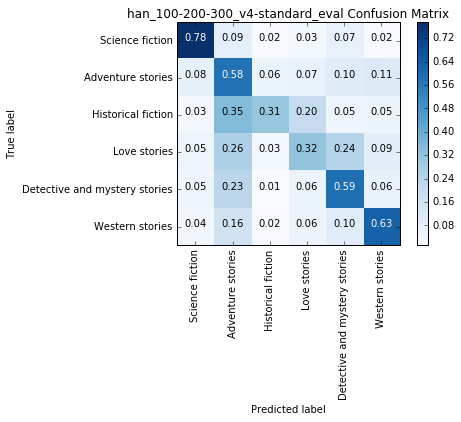

In [3]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.epochs=10
tf.flags.FLAGS.term_embedding_size=50
tf.flags.FLAGS.sentence_embedding_size=100
tf.flags.FLAGS.document_embedding_size=150
tf.flags.FLAGS.batch_queue_capacity=1024
tf.flags.FLAGS.max_grad_norm=5
tf.flags.FLAGS.batch_size=36
tf.flags.FLAGS.learning_rate=1e-3

model_name = 'han_100-200-300_v4'
evaluation_name = 'standard_eval'
univ = gb_chap_han.GbChaptersHANUniversity(model_name, training_wkspc, dataset_wkspc)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name)

Validation Step 544
Targets:
[1 2 2 0 2 3 1 2 3 5 4 3 3 3 2 1 0 3 2 2 1 4 0 4 1 3 1 1 1 3 4 2 1 3 5 4]
Predictions:
[1 3 1 0 3 1 1 1 3 1 4 4 3 4 1 4 0 1 1 1 4 4 0 2 3 3 1 1 1 1 4 1 1 3 3 3]
Loss 1.98298, Acc 0.444444

Testing examples exhausted
Shutting down all network threads
Checking validation mode... {'aggr_books': True}
Evaluating the full book aggregation.
Accuracy: 0.674928503337
F1: 0.600151340021


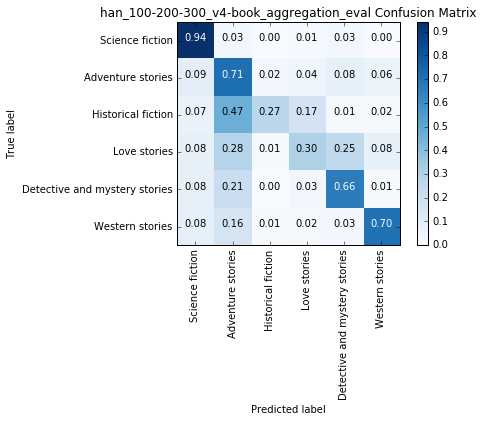

In [4]:
evaluation_name = 'book_aggregation_eval'
univ = gb_chap_han.GbChaptersHANUniversity(model_name, training_wkspc, dataset_wkspc)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name, **{"aggr_books": True})